<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Mini_Projeto_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Questão de Negócio:**

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de imóveis. Com dados de uma região, um algoritmo pode classificar e identificar se aquele imóvel é bom ou não para comprar, auxiliando uma pessoa na examinação de um imóvel de forma que ele seja o melhor para o cliente. Não só isso, algoritmos de machine learning podem trazer novos insights na compra e venda de imóveis, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do imóvel. Portanto um dos grandes desafios é encontrar modelos e algoritmos que equilibram a precisão na compra de um imóvel. Esse estudo busca aprofundar no diagnóstico de como irenmos escolher 5 imóveis para investir e 5 imóveis que não deixariamos nosso cliente investir de modo algum.

# **O Entendimento do Negócio:**

Os dados são da ***geodacenter.github.io***, em King County - Condado de King - Washington, Estados Unidos. O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos. Iremos buscar as ferramentas necessárias para catalogar e mostrar quais são os 5 melhores imóveis devemos investir e quais são os 5 piores imóveis a se investir de acordo com os dados recebidos.

# **A Coleta de Dados:**

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset Detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [4]:
kc = pd.read_csv("/content/kc_house_data.csv")
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **A Limpeza de Dados:**

- Remoção de dados outliers e valores ausentes

Foram modificados a coluna bathrooms de numeros float para numeros inteiros

In [45]:
kcs = kc.drop(columns=['lat', 'long'])




In [46]:
kcs = kcs.astype({"bathrooms": int})


In [47]:
kcs_waterfront = kcs[kcs.waterfront == 1]


In [48]:
kcs_view = kcs[kcs.view == 4]


In [49]:
kcs_yr_built = kcs[kcs.yr_built >= 2000]

In [50]:
kcs = kc.astype({"bathrooms": int})

kcs


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **A Exploração de Dados:**

* A Exploração de Dados:
- Visualização dos dados
- Quais as minhas métricas essenciais
- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

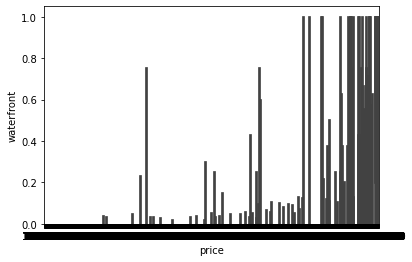

In [53]:
kcs.info()
kcs
sns.barplot(data=kcs, x='price', y='waterfront');


## ***Análise final + Sugestão de imóveis ***

Baseado nestes pensamentos que você utilizou
para responder as perguntas acima, qual seria os 5
imóveis que a empresa deveria investir e o porquê e
quais 5 você não recomendaria o investimento de
jeito nenhum.

- Encontre a cidade de cada imóvel;
- Calcule o preço por área de imóvel;
- Calcule o lucro/ perda de investimento caso o imóvel
seja vendido mais de uma vez naquele período.